In [11]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import IPython.display as display
import os

from classes import *
from tqdm import tqdm
from utils import *

from pyswip import Prolog
from typing import List, Tuple

# fix the seed for reproducibility (not fixing the seed for the whole program since we have imports!)
random.seed(667)
np.random.seed(667)

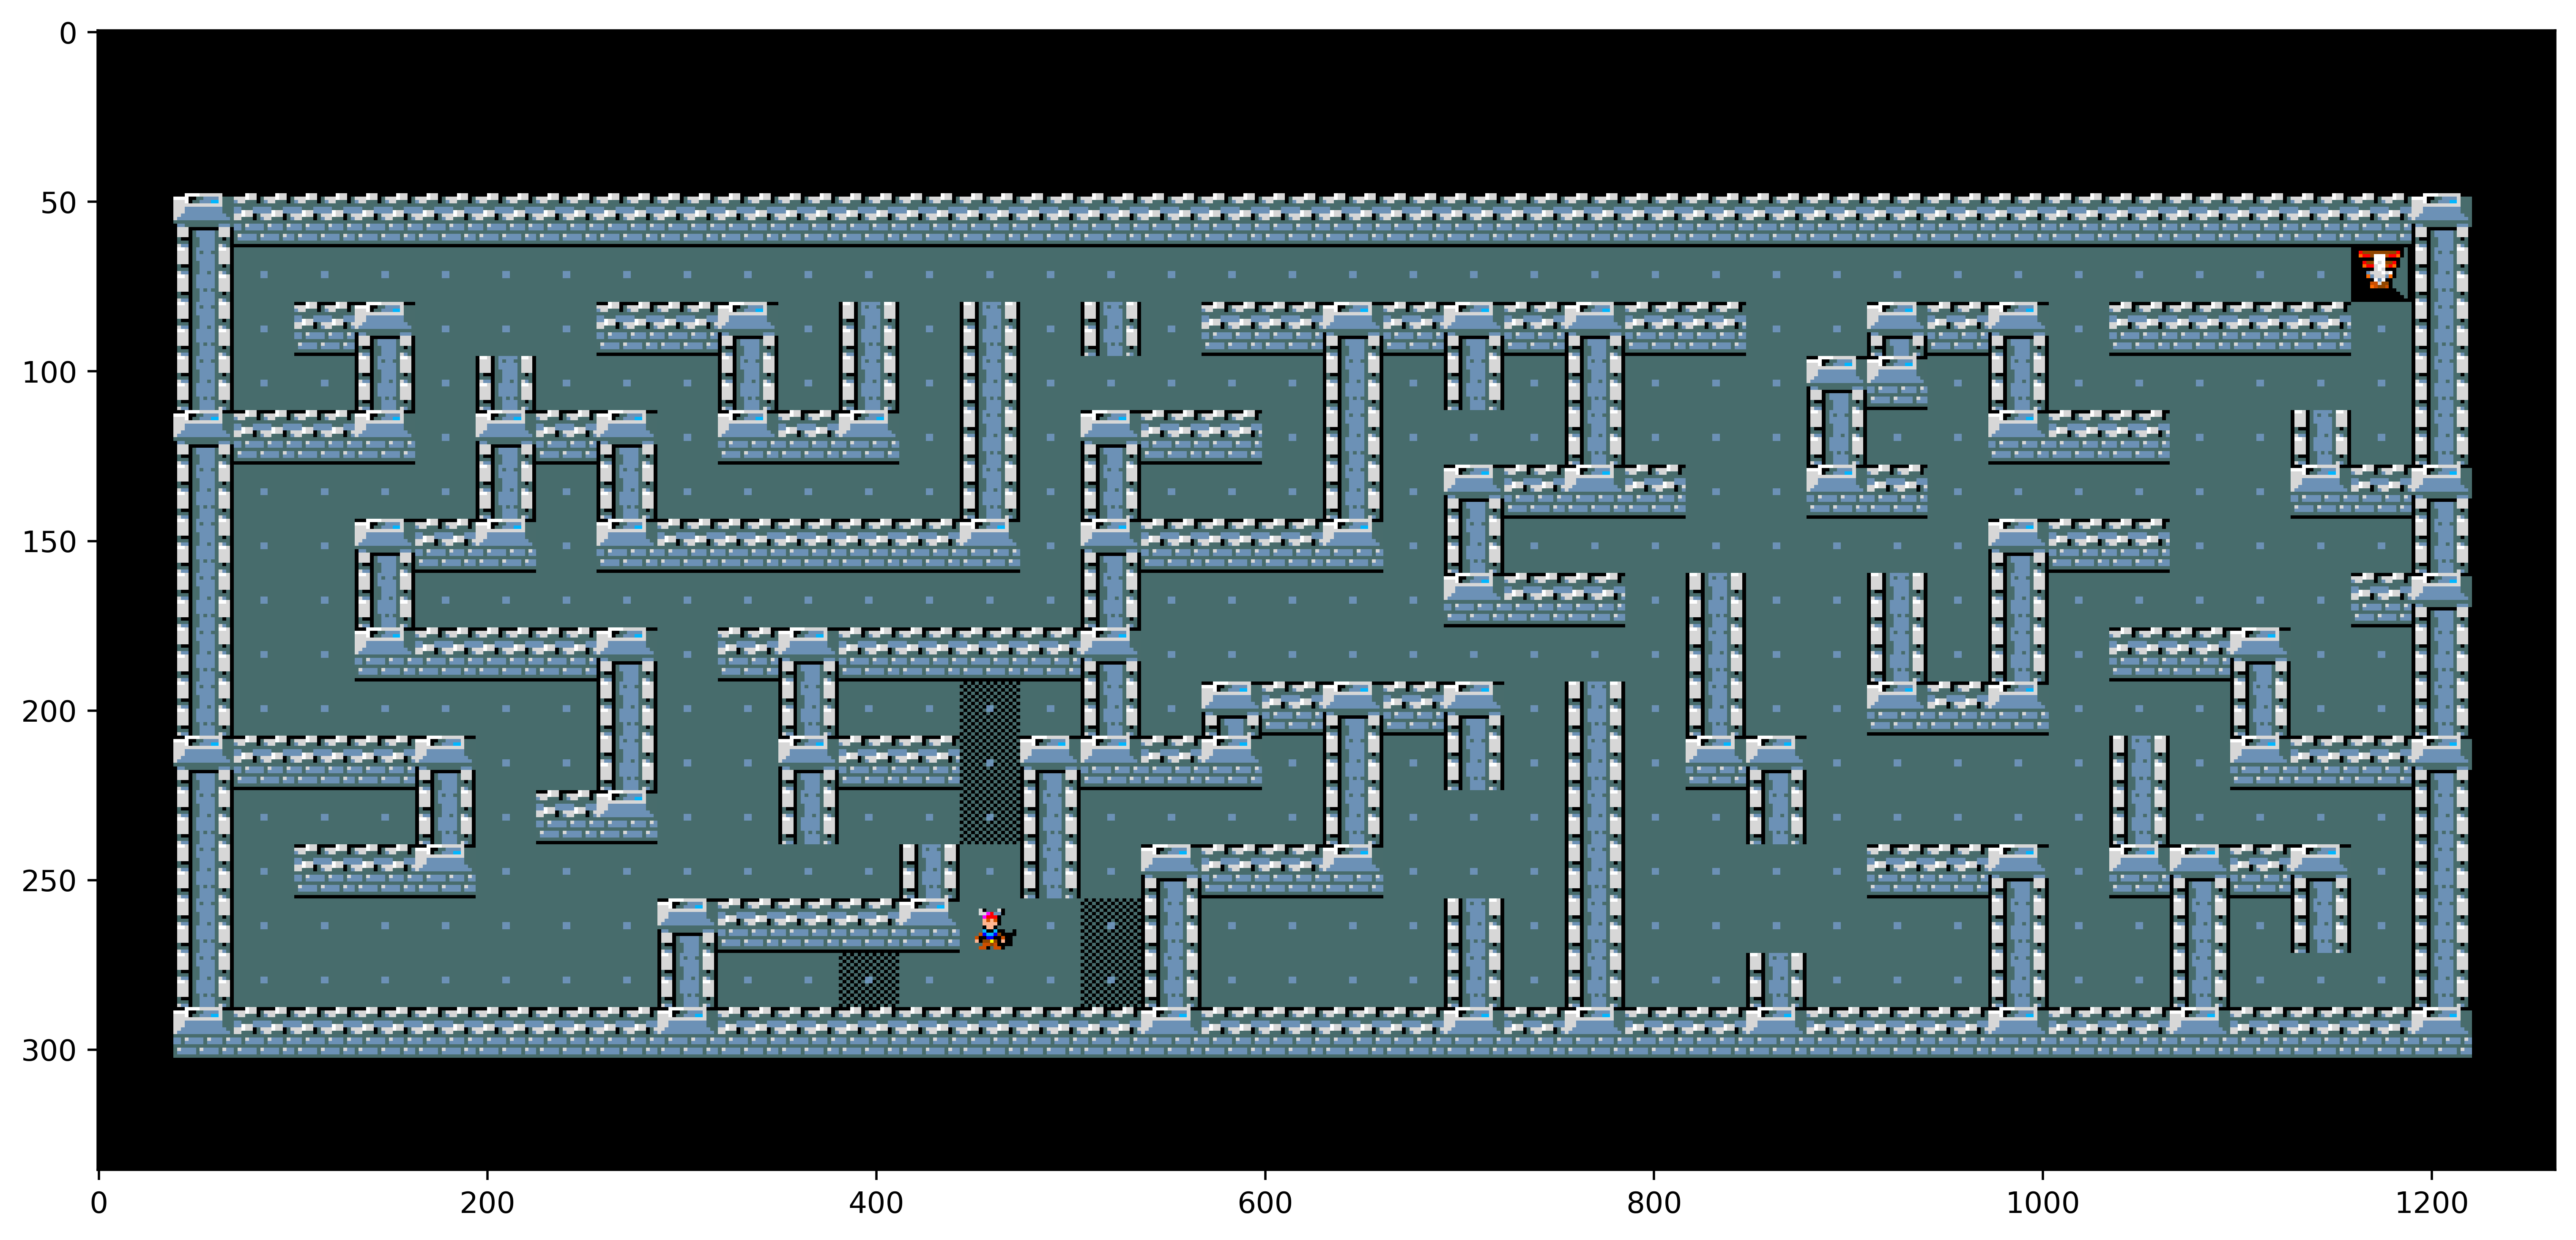

In [15]:
plt.rcParams["figure.figsize"] = [15, 7]
# set dpi to 500
plt.rcParams["figure.dpi"] = 500
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file="maps/pres.des",
    max_episode_steps=10000,
)
state = env.reset()
# env.render()
plt.imshow(state["pixel"], aspect="auto").set_data(state["pixel"][:, 300:950])  # type: ignore